# Analyse du data Set PyOCaRe
### Participants:
 - Samy Mazouz
 - Ari-Vinoth Sekar
 - Benjamin Tabet

## Analyse de Forme :
- **variable target** : target
- **lignes et colonnes** : 115320, 10
- **types de variables** : quantitatives : 10
- **Analyse des valeurs manquantes** :
    - Aucune valeur manquante

## Analyse de Fond :
- **Visualisation de la target** :
    - 84% de positifs (96456 / 115320)
    - 16% de négatifs  (18864/115320)
    
    
- **Signification des variables** :
    - FileName: Nom du fichier png	
    - greyLevel: Nuance de gris de l'image ( 0 noir -> 255 blanc)
    - target: Détection du mot ( 0 si non, 1 si Oui)
    - X_Begin: Position départ absisses
    - Y_Begin: Position départ ordonnée	
    - Width: Largeur de l'image
    - Height: Hauteur de l'image	
    - Tag: Nature du mot
    - Word: Mot identifié
    - Path: Chemin d'accès à l'image



- **Relation Variables / Target** :
    - target/X_Begin:Il semble qu'il y est un impact sur la detection lorsque le mot se trouve au début du formulaire
    - target/Height: Il semble que lorsque la hauteur du mot est situé entre 50 et 100 le taux de détection est plus élevé
    - target/len: Au dessus de 30 caractère aucun mot ne semble être détecté
    - target/width: 
        - Au dessus de 1200 pxels aucun mot ne semble être détecté
        - Lorsque la valeur est -1 l'image est absente    
    
    
## Analyse plus détaillée

- **Absence de détection** : nous pouvons constaté dans les cas non détectés que :
    - image grande:
        - non découpé
        - caractère inconnu comme des tirés
        - mot raturé
        - orientation de l'image non horizontale


    

In [1]:
#Import Utiles
import pandas as pd
import numpy as np
from collections import Counter
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import PIL.Image

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Ignorance des warnings

import warnings
warnings.filterwarnings('ignore')


In [3]:
#Importation du fichier csv après conversion et traitement

df_words = pd.read_csv('word.csv')
df_words.head()

fileName  target  greyLevel  x_Begin  y_Begin  width  height  tag  \
0  a01-000u-00-00       1        154      408      768     27      51   AT   
1  a01-000u-00-01       1        154      507      766    213      48   NN   
2  a01-000u-00-02       1        154      796      764     70      50   TO   
3  a01-000u-00-03       1        154      919      757    166      78   VB   
4  a01-000u-00-04       1        154     1185      754    126      61  NPT   

   word  len  space_in_text                                   path  
0     A    1              0  words/a01/a01-000u/a01-000u-00-00.png  
1  MOVE    4              0  words/a01/a01-000u/a01-000u-00-01.png  
2    to    2              0  words/a01/a01-000u/a01-000u-00-02.png  
3  stop    4              0  words/a01/a01-000u/a01-000u-00-03.png  
4   Mr.    3              0  words/a01/a01-000u/a01-000u-00-04.png

In [4]:
#Repartition de la variable target
df_words['target'].value_counts(normalize = True)

1    0.83642
0    0.16358
Name: target, dtype: float64

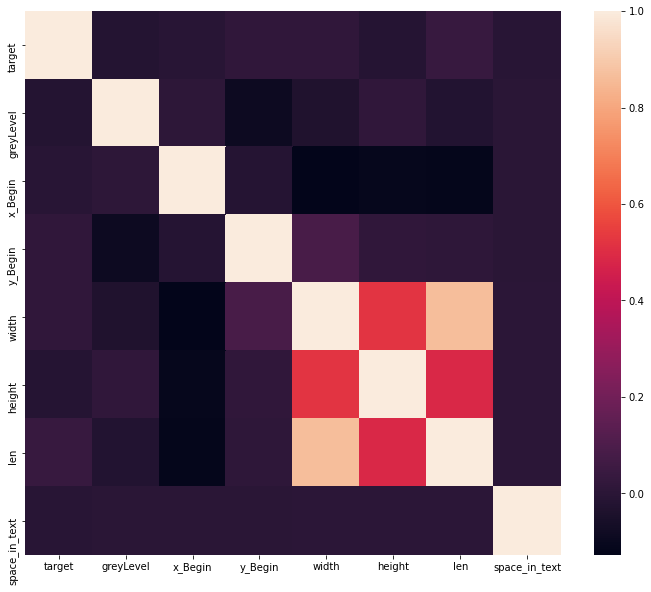

In [5]:
#Affichage d'un heatmap de correlation

plt.figure(figsize=(12,10))
sns.heatmap(df_words.corr())
plt.show()

#### L'analyse des corrélations entre les variables ne nous indique pas grand chose mise à part une forte corrélation entre le nombre de caractères d'un mot et la largeur de l'image (assez attendu)
#### Il semble également y avoir une corrélation entre largeur et hauteur mais pas aussi forte que ce que l'on pourrait intuiter
#### Il semblerait que plus le mot contient de caractères plus celui-ci aura une image grande. Cela est du à la plus grande probabilité d'avoir une lettre "grande" dans un mot si celui-ci est long ( ex : L/ F /G )
    

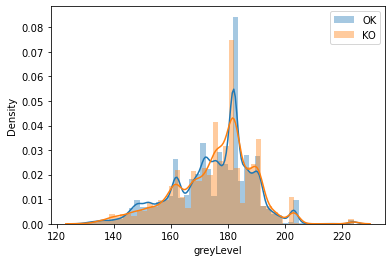

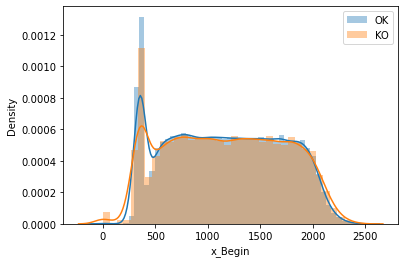

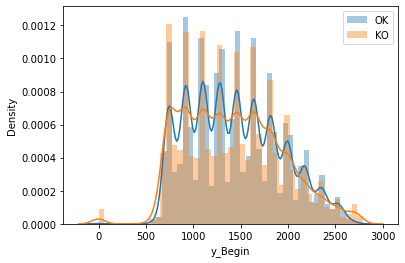

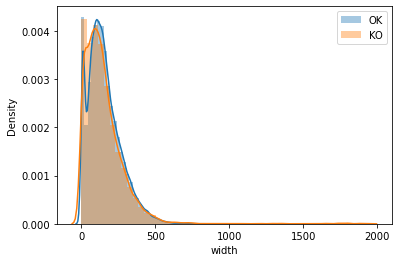

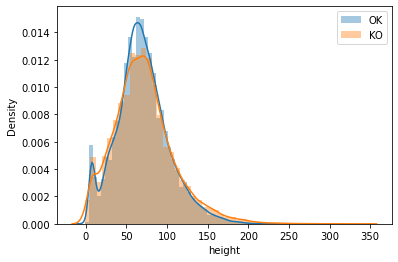

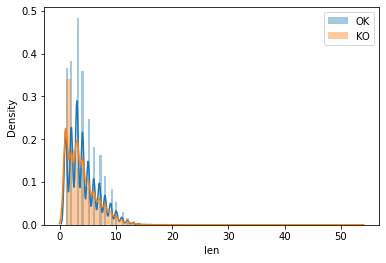

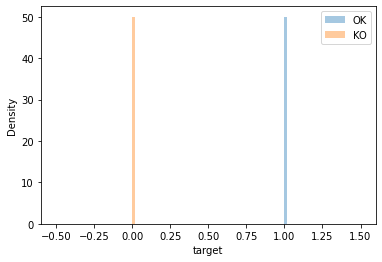

In [6]:
#Analyse des différentes colonnes au travers de displot 
#Cette methode nous permettra d'analyser les courbes de chaque variable pour les différentes options de la cible
columns = ['greyLevel', 'x_Begin','y_Begin','width','height', 'len', 'target']

for col in columns:
    plt.figure()
    sns.distplot(df_words[df_words['target']==1][col], label='OK')
    sns.distplot(df_words[df_words['target']==0][col], label='KO')

    plt.legend()

## Impact du nombre de lettre sur la détection du mot

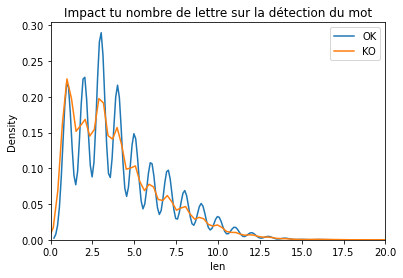

In [7]:
#Analyse de l'impact tu nombre de lettre sur la détection du mot
plt.figure()
plt.title('Impact tu nombre de lettre sur la détection du mot')
sns.distplot(df_words[df_words['target']==1]['len'], hist =False, label='OK')
sns.distplot(df_words[df_words['target']==0]['len'], hist =False,label='KO')
plt.xlim(0,20)
plt.legend()

# Recherche des relation entre variables

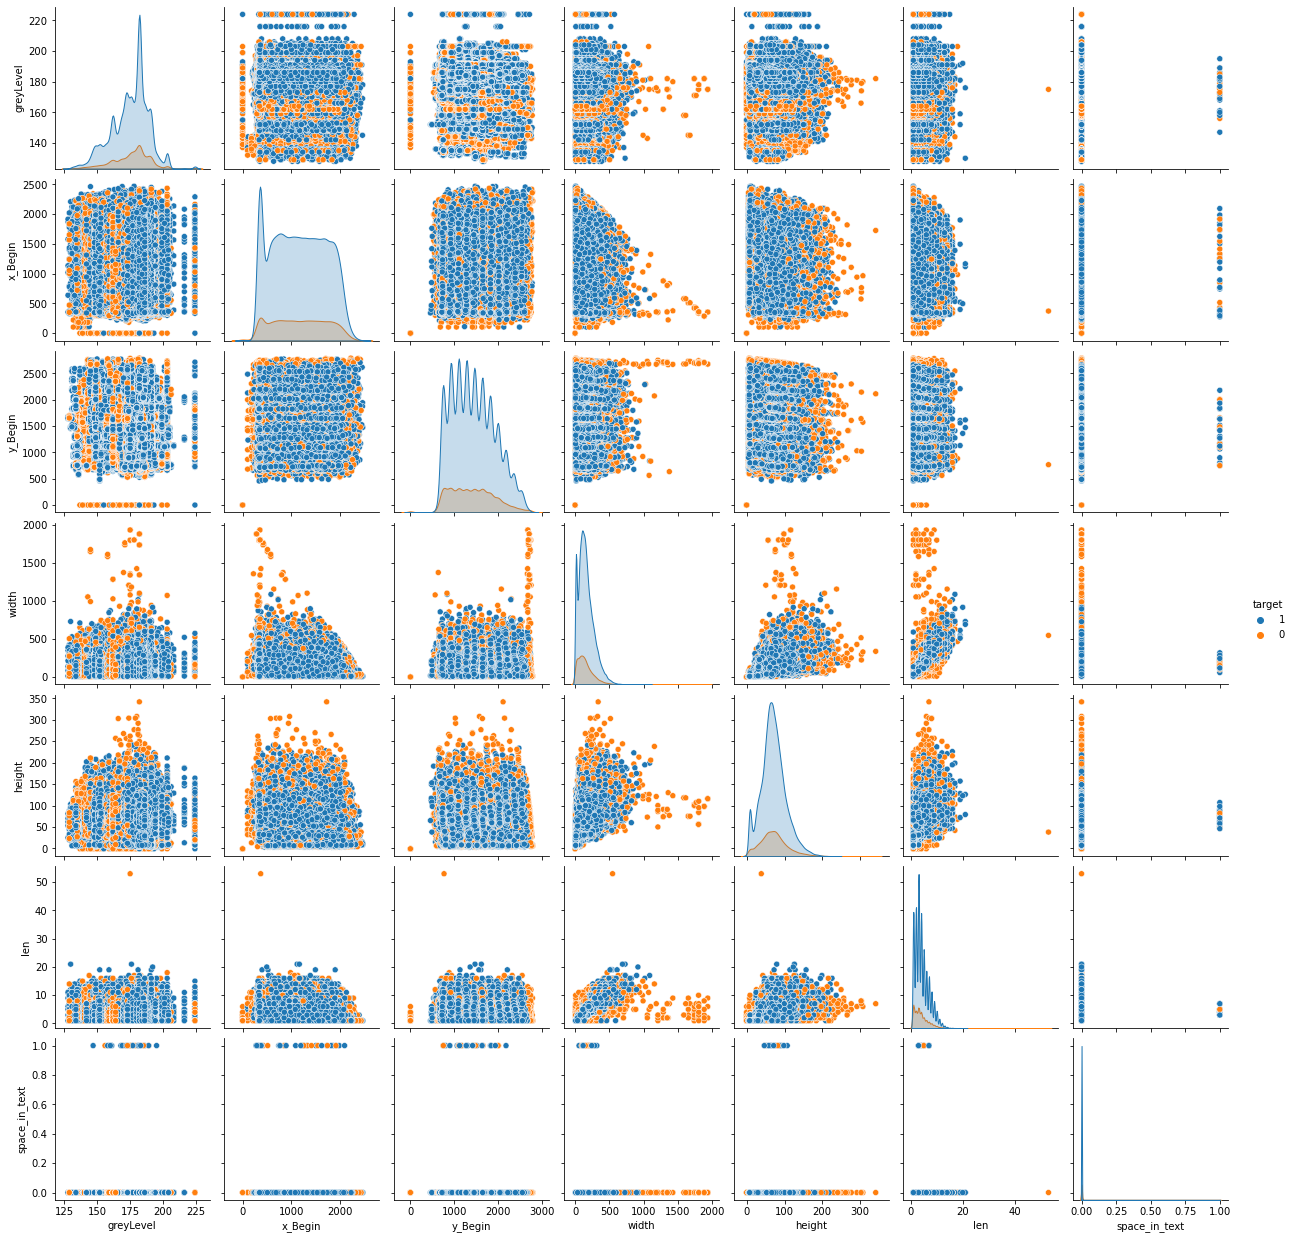

In [8]:
#Affichage d'un pairplot sur le DF à l'image du DataSet d'entrée
sns.pairplot(df_words, hue = 'target',hue_order=[1,0])

# Détection des valeurs abérantes
### On constate sur le pairplot, la présence de point trés éloignés pour les graphiques de mise en relation des variables largeur du mot et nombre de lettre
### Pour cela, nous avons décidé de séparer le DataSet en 2 groupes:
- Un pour les valeurs abhérentes:
    - largeur de l'image supérieur à 1200
    - longueur du mot supérieur à 30 lettres
- Un pour les autres valeurs

### Affichage des dimensions des 2 dataSets

In [10]:
#Isolation des valeurs ayant plus de 30 lettres car supposé abhérente
dfOff= df_words[(df_words['len']>30) | (df_words['width']>1200)| (df_words['width'] == -1)]
dfClean= df_words[(df_words['len']<30)& (df_words['width']<1200) & (df_words['width']!=-1)]

print('dfOff.shape', dfOff.shape)
print('dfClean.shape', dfClean.shape)


dfOff.shape (190, 12)
dfClean.shape (115130, 12)


### Affichage d'image aléatoire sur le data Set Clean

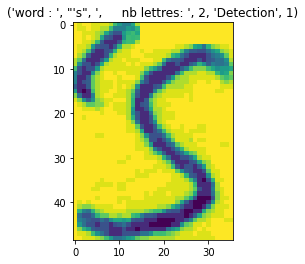

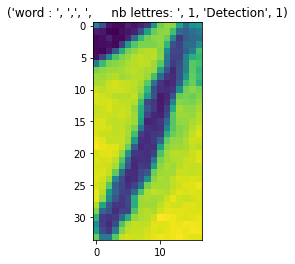

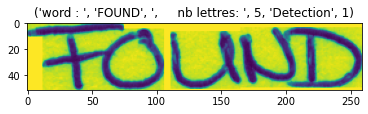

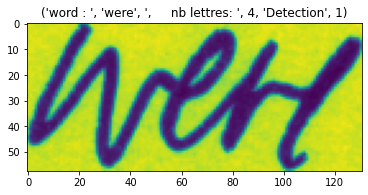

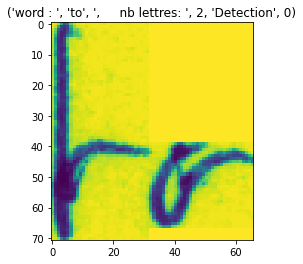

In [11]:
for index  in dfClean.sample(n = 5).index:
    img = mpimg.imread(dfClean.loc[index,'path'])
    imgplot = plt.imshow(img)
    title = 'word : ',dfClean.loc[index,'word'], ',     nb lettres: ',dfClean.loc[index,'len'], 'Detection',  dfClean.loc[index,'target']
    plt.title(title)
    plt.show()


## Affichage d'un nouveau pairplot sur le DataFrame excluant les valeurs abhérentes:

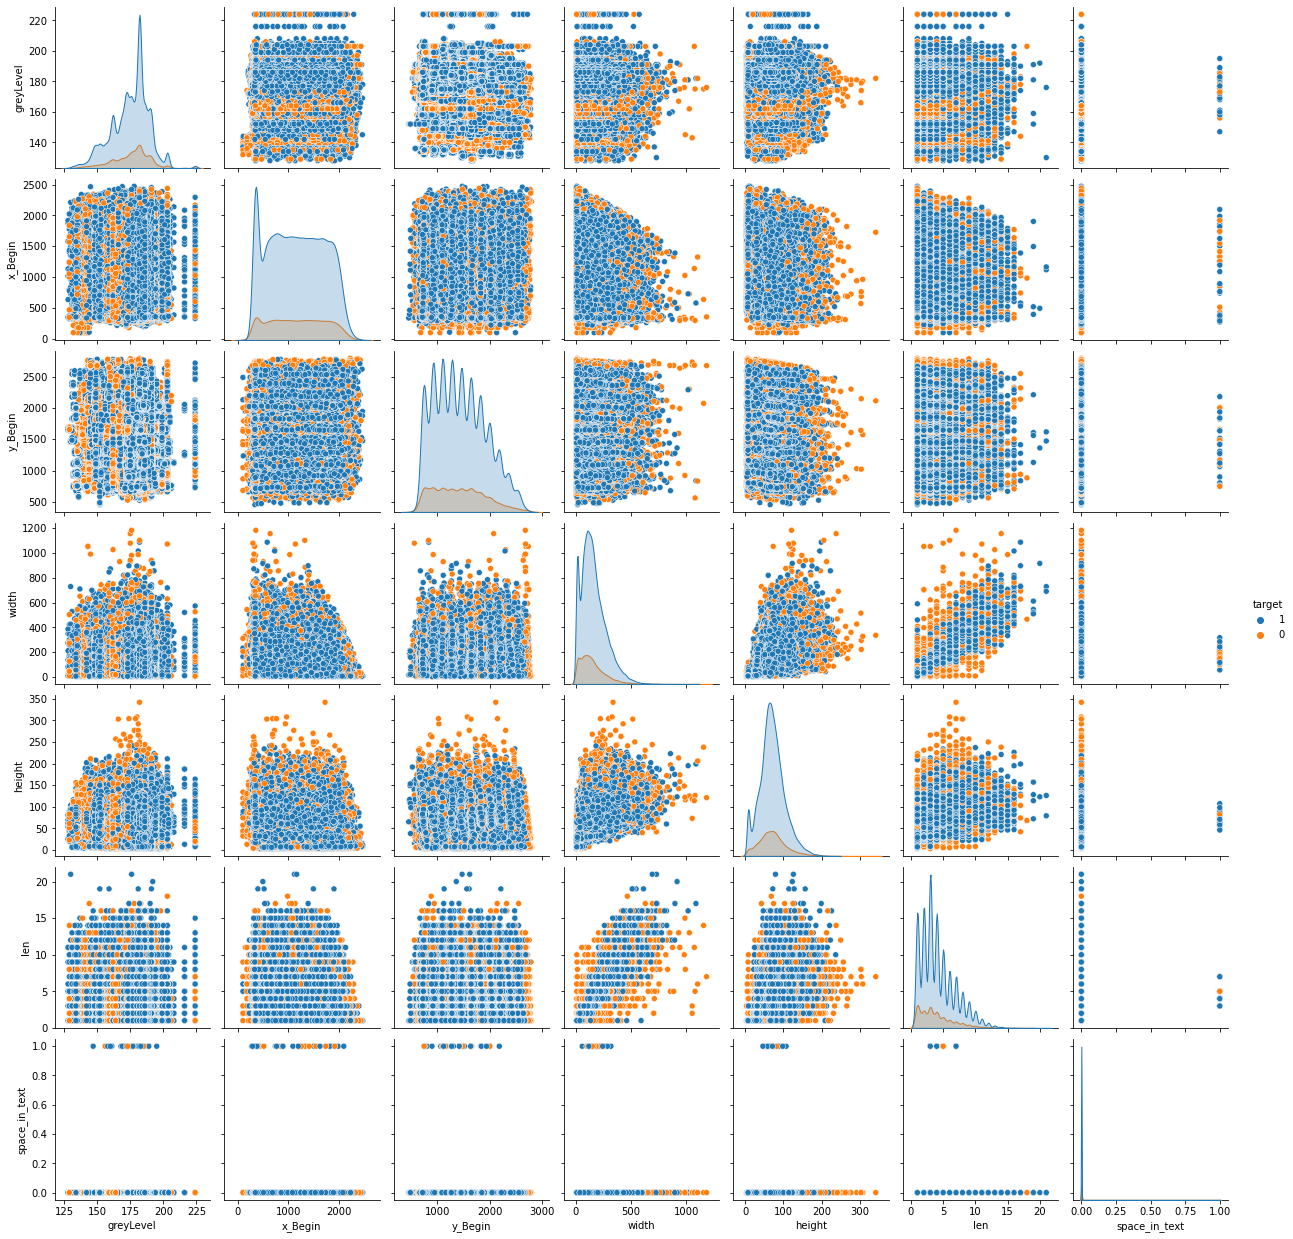

In [12]:
#Affichage d'un pairplot sur le DF contenant les varibales propres
sns.pairplot(dfClean, hue = 'target',hue_order=[1,0])

### Le pairplot permet d'observer la claire relation entre le nombre de lettre d'un mot et la longueur de l'image donnant place a de mauvaise détection

### Nous observons également de zone de greyLevel concentrant pas mal d'erreur de reconnaissance autour des 140 et de 160 

## Affichage d'un pairplot sur les valeurs abhérentes:
### Nous pouvons observer que toutes ces valeurs n'ont pas été détecté correctement

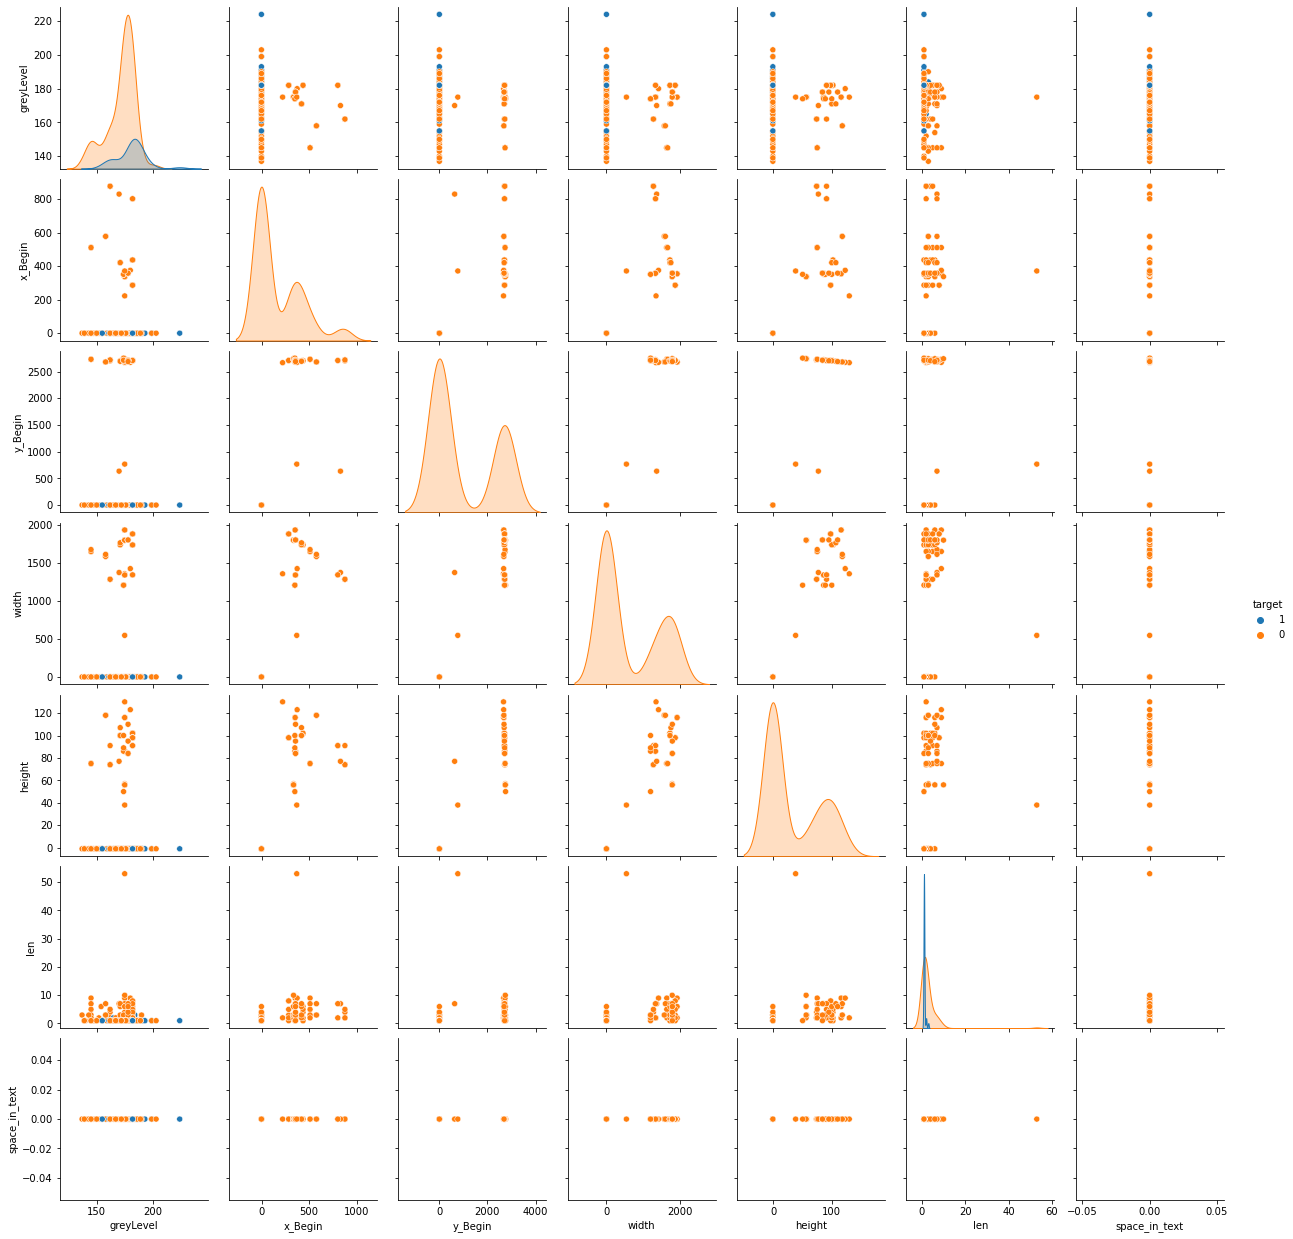

In [13]:
#Affichage d'un Paiplot sur le DF contenant les valeurs abhérantes 
sns.pairplot(dfOff, hue = 'target',  hue_order=[1,0])

### Affichage des images de valeurs abhérentes

#### Analyse des images avec une grande largeur

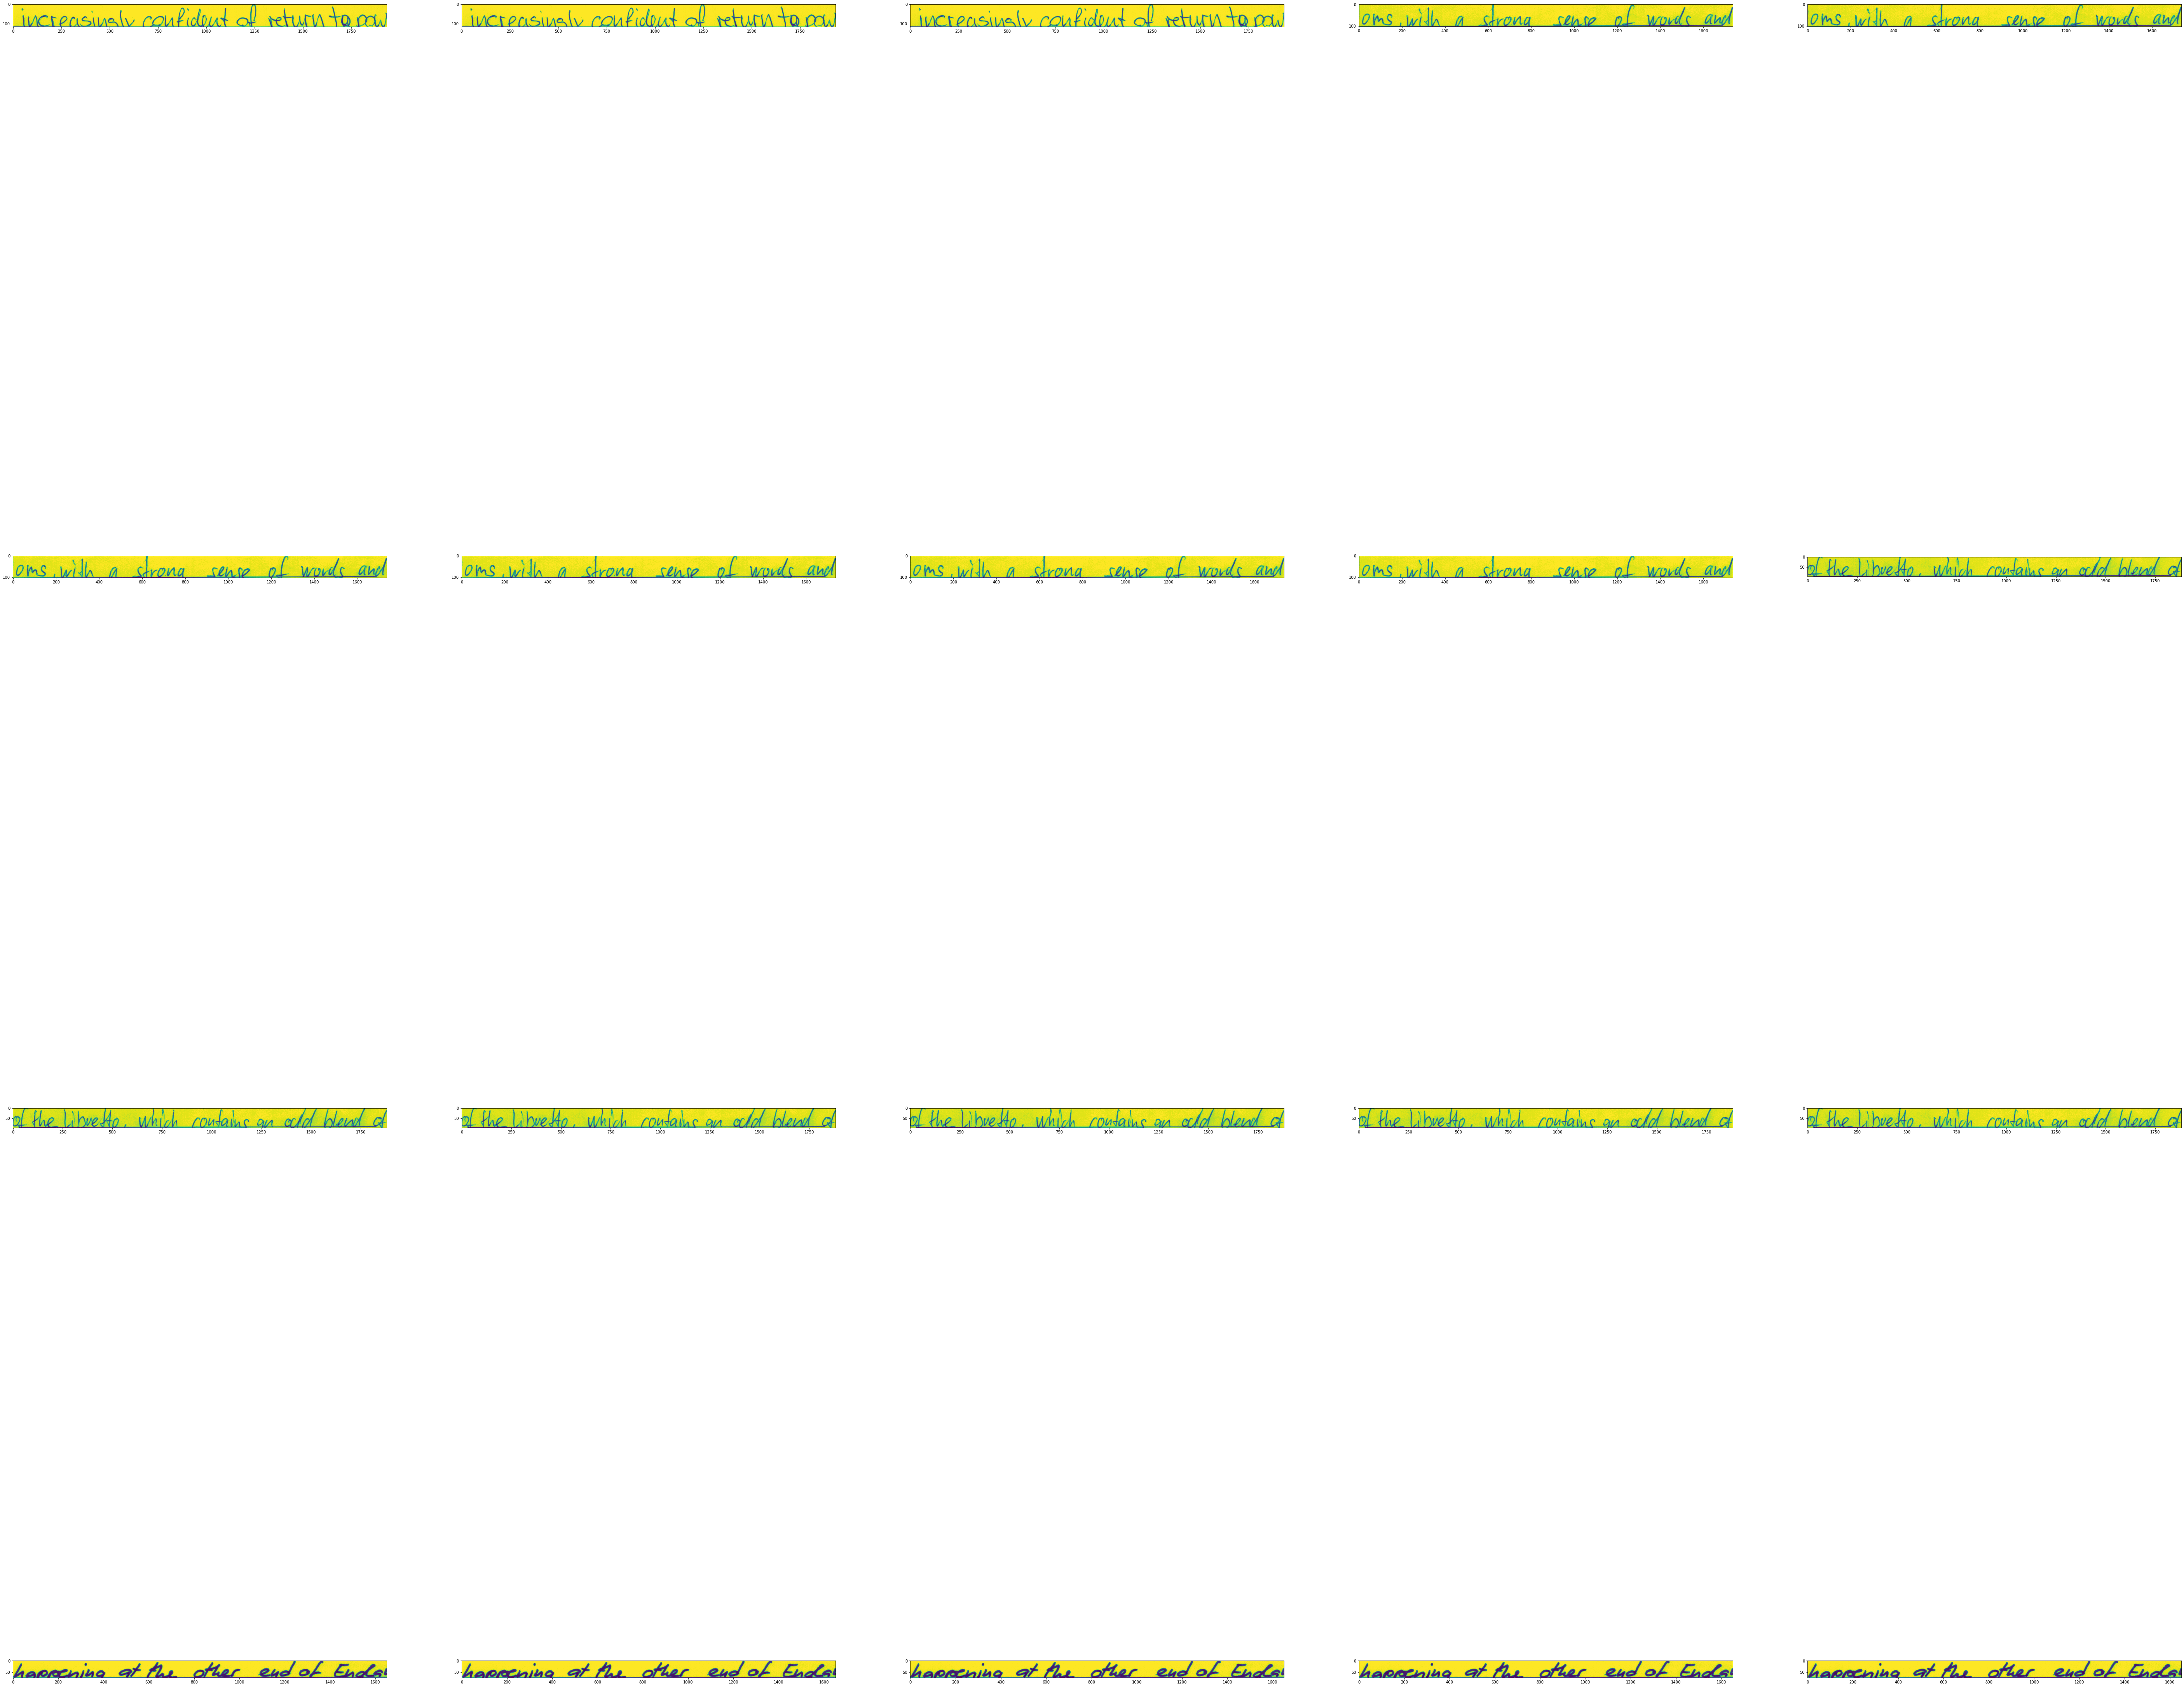

In [14]:
#Création d'un DF contenant les images ayant une largeur comprise entre 1500 et 2000 et pour lesquelles les mots ont bien été detecté
dferr = df_words[(df_words['width'] <2000) & (df_words['width'] >1500) & (df_words['target'] == 0)]

#Affichage aléatoire des images du DF
fig=plt.figure(figsize=(100, 100))
columns = 5
rows = min(len(dferr)/5,4)
for i in range(1, columns*rows +1): 
    img = dferr.iloc[i,11]
    pil_im = PIL.Image.open(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.asarray(pil_im))

#### Nous avons ici des morceaux de phrases qui n'ont pas pu être redécoupé en mots d'où une largeur de l'image plus grande et ces erreurs dans la détection

#### Analyse des images avec une grande hauteur

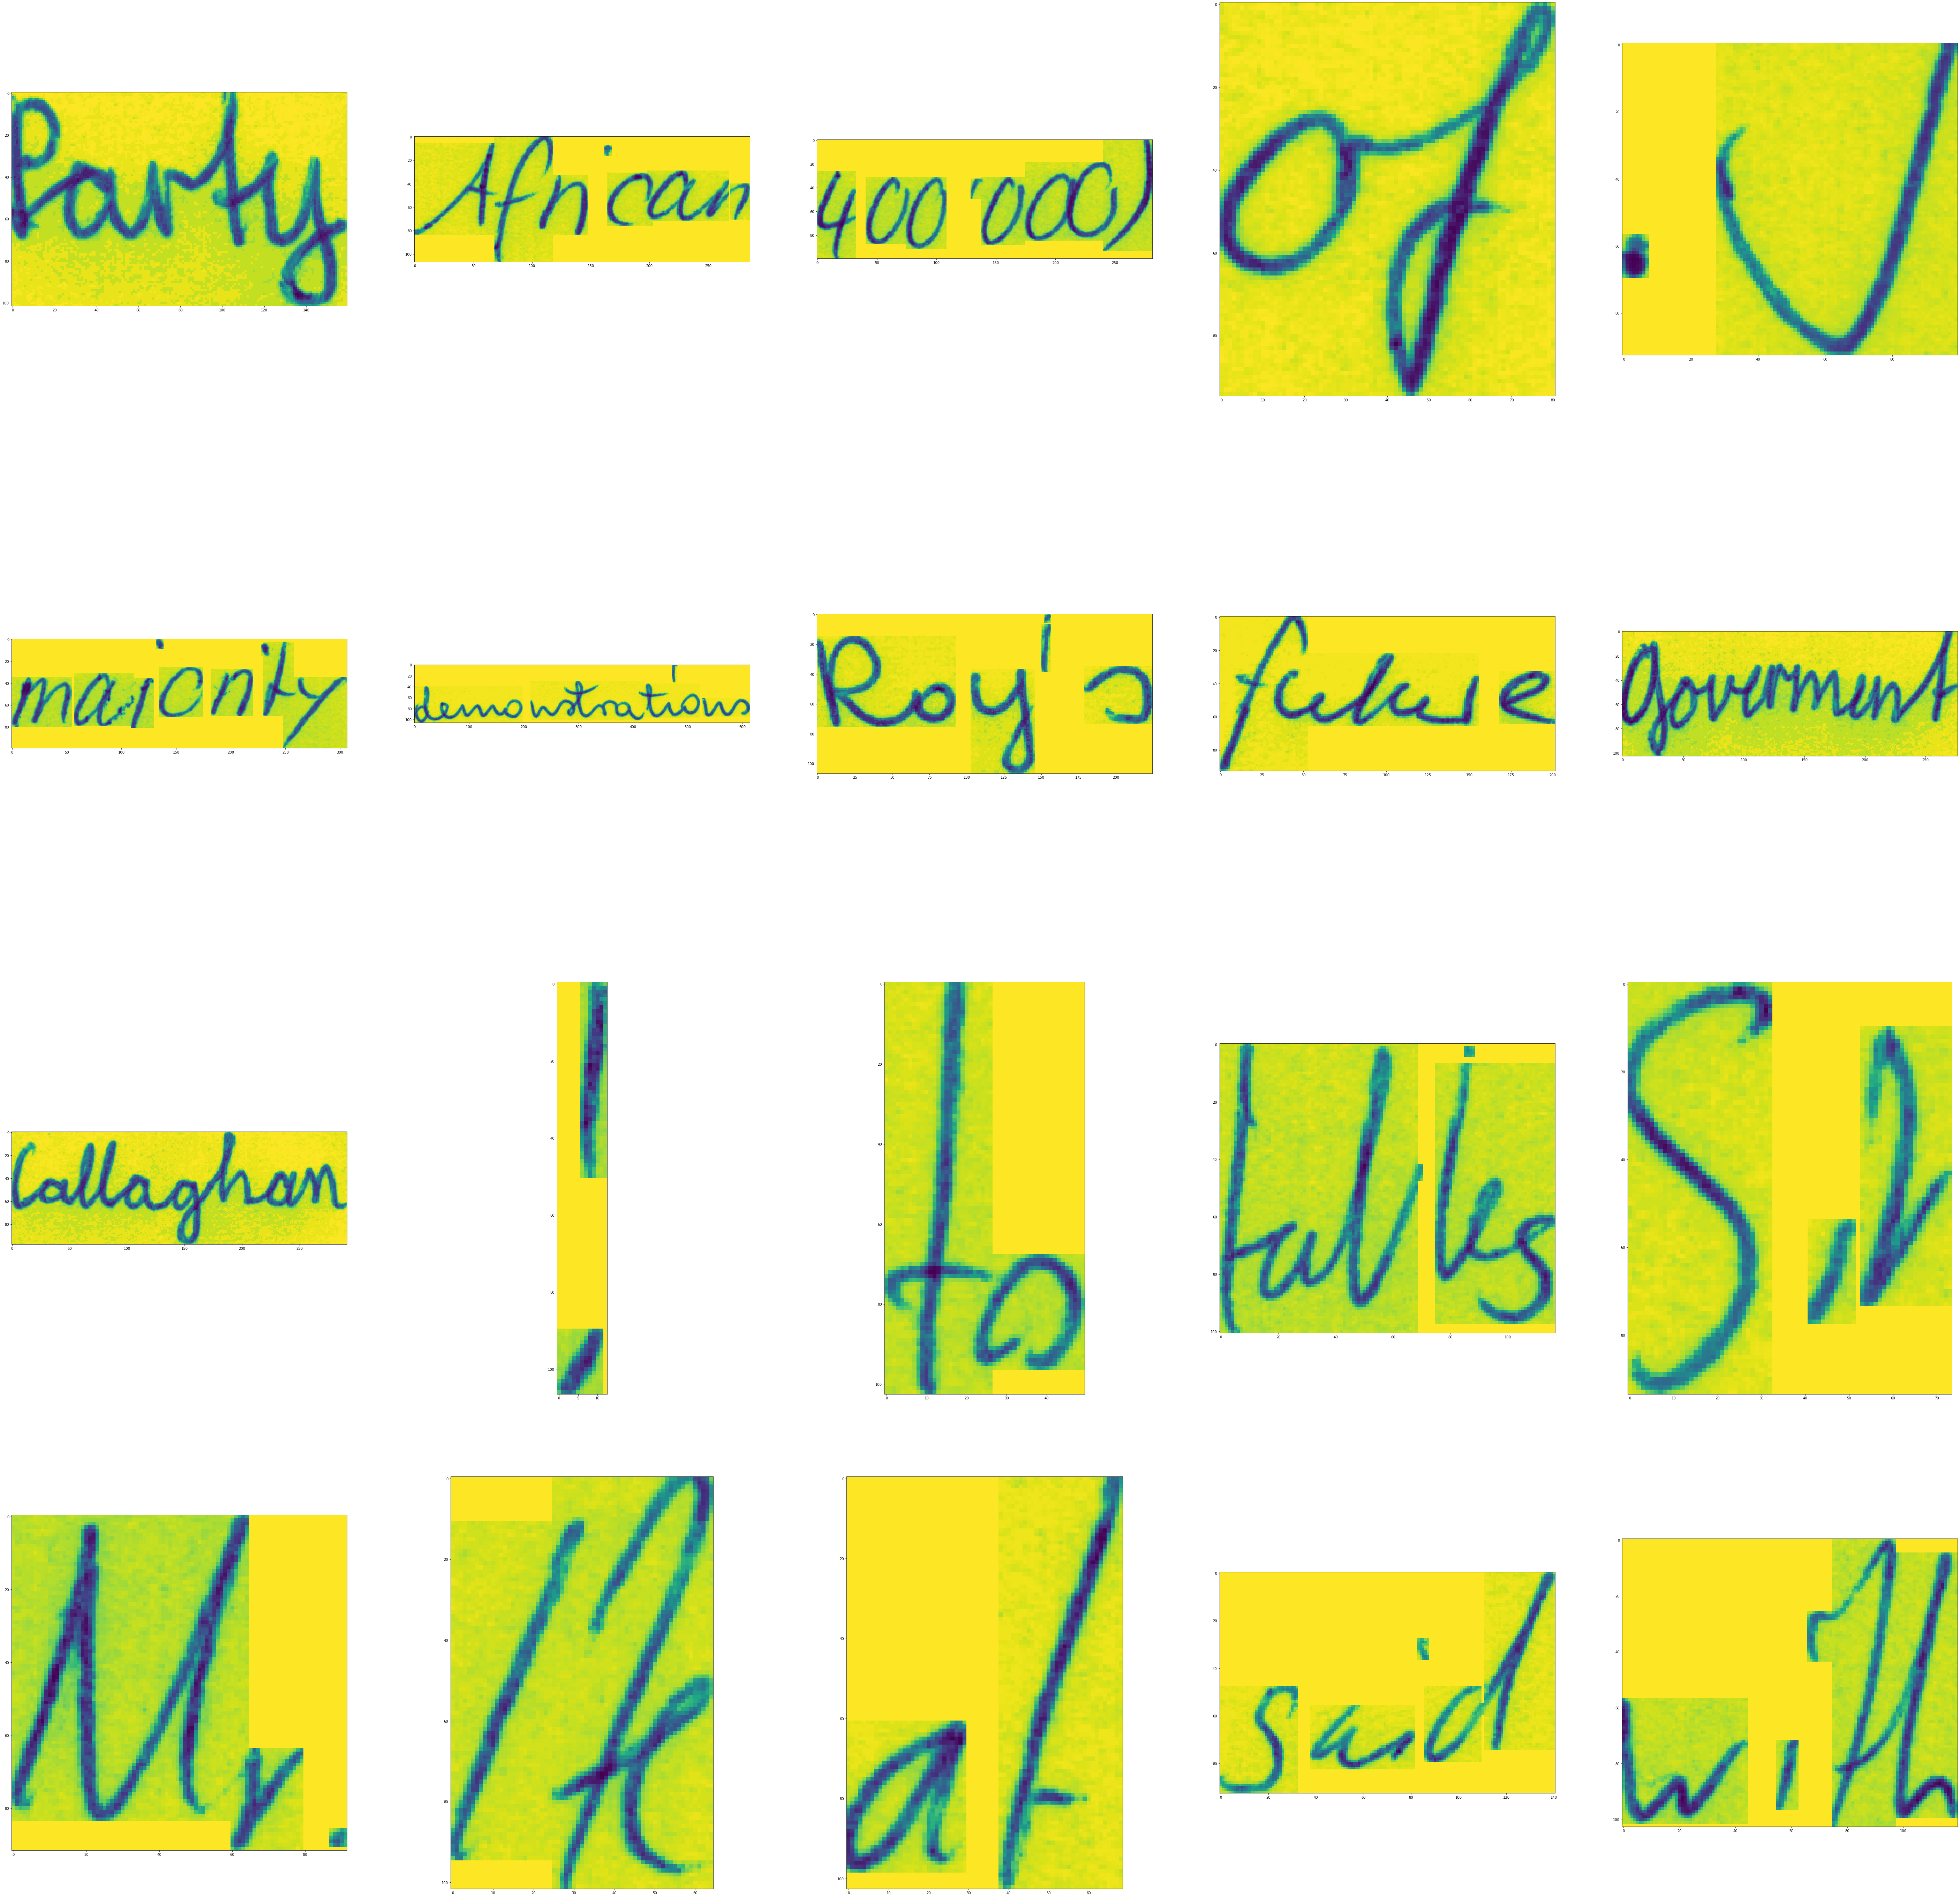

In [15]:
#Création d'un DF contenant les images ayant une hauteur comprise entre 90 et 110 et ayant bien été detecté
dferr = df_words[(df_words['height'] <110) & (df_words['height'] >90) & (df_words['target'] == 0)]

#Afficage aléatoire des images du DF
fig=plt.figure(figsize=(100, 100))
columns = 5
rows = min(len(dferr)/5,4)
for i in range(1, columns*rows +1): 
    img = dferr.iloc[i,11]
    pil_im = PIL.Image.open(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.asarray(pil_im))

#### On peut observer que la présence de ponctuation d'apostrophe ou de point sur des I pourrait avoir une incidence sur la dectection et qui explique parfois les hauteurs plus grandes des mots
#### il pourrait être aussi intéressant de s'intéresser au taux de détection en fonction du ratio w/h pour voir si une image plus large que haute a une meilleure chance d'être lu qu'une image plus haute que large.

Analyse des petites images


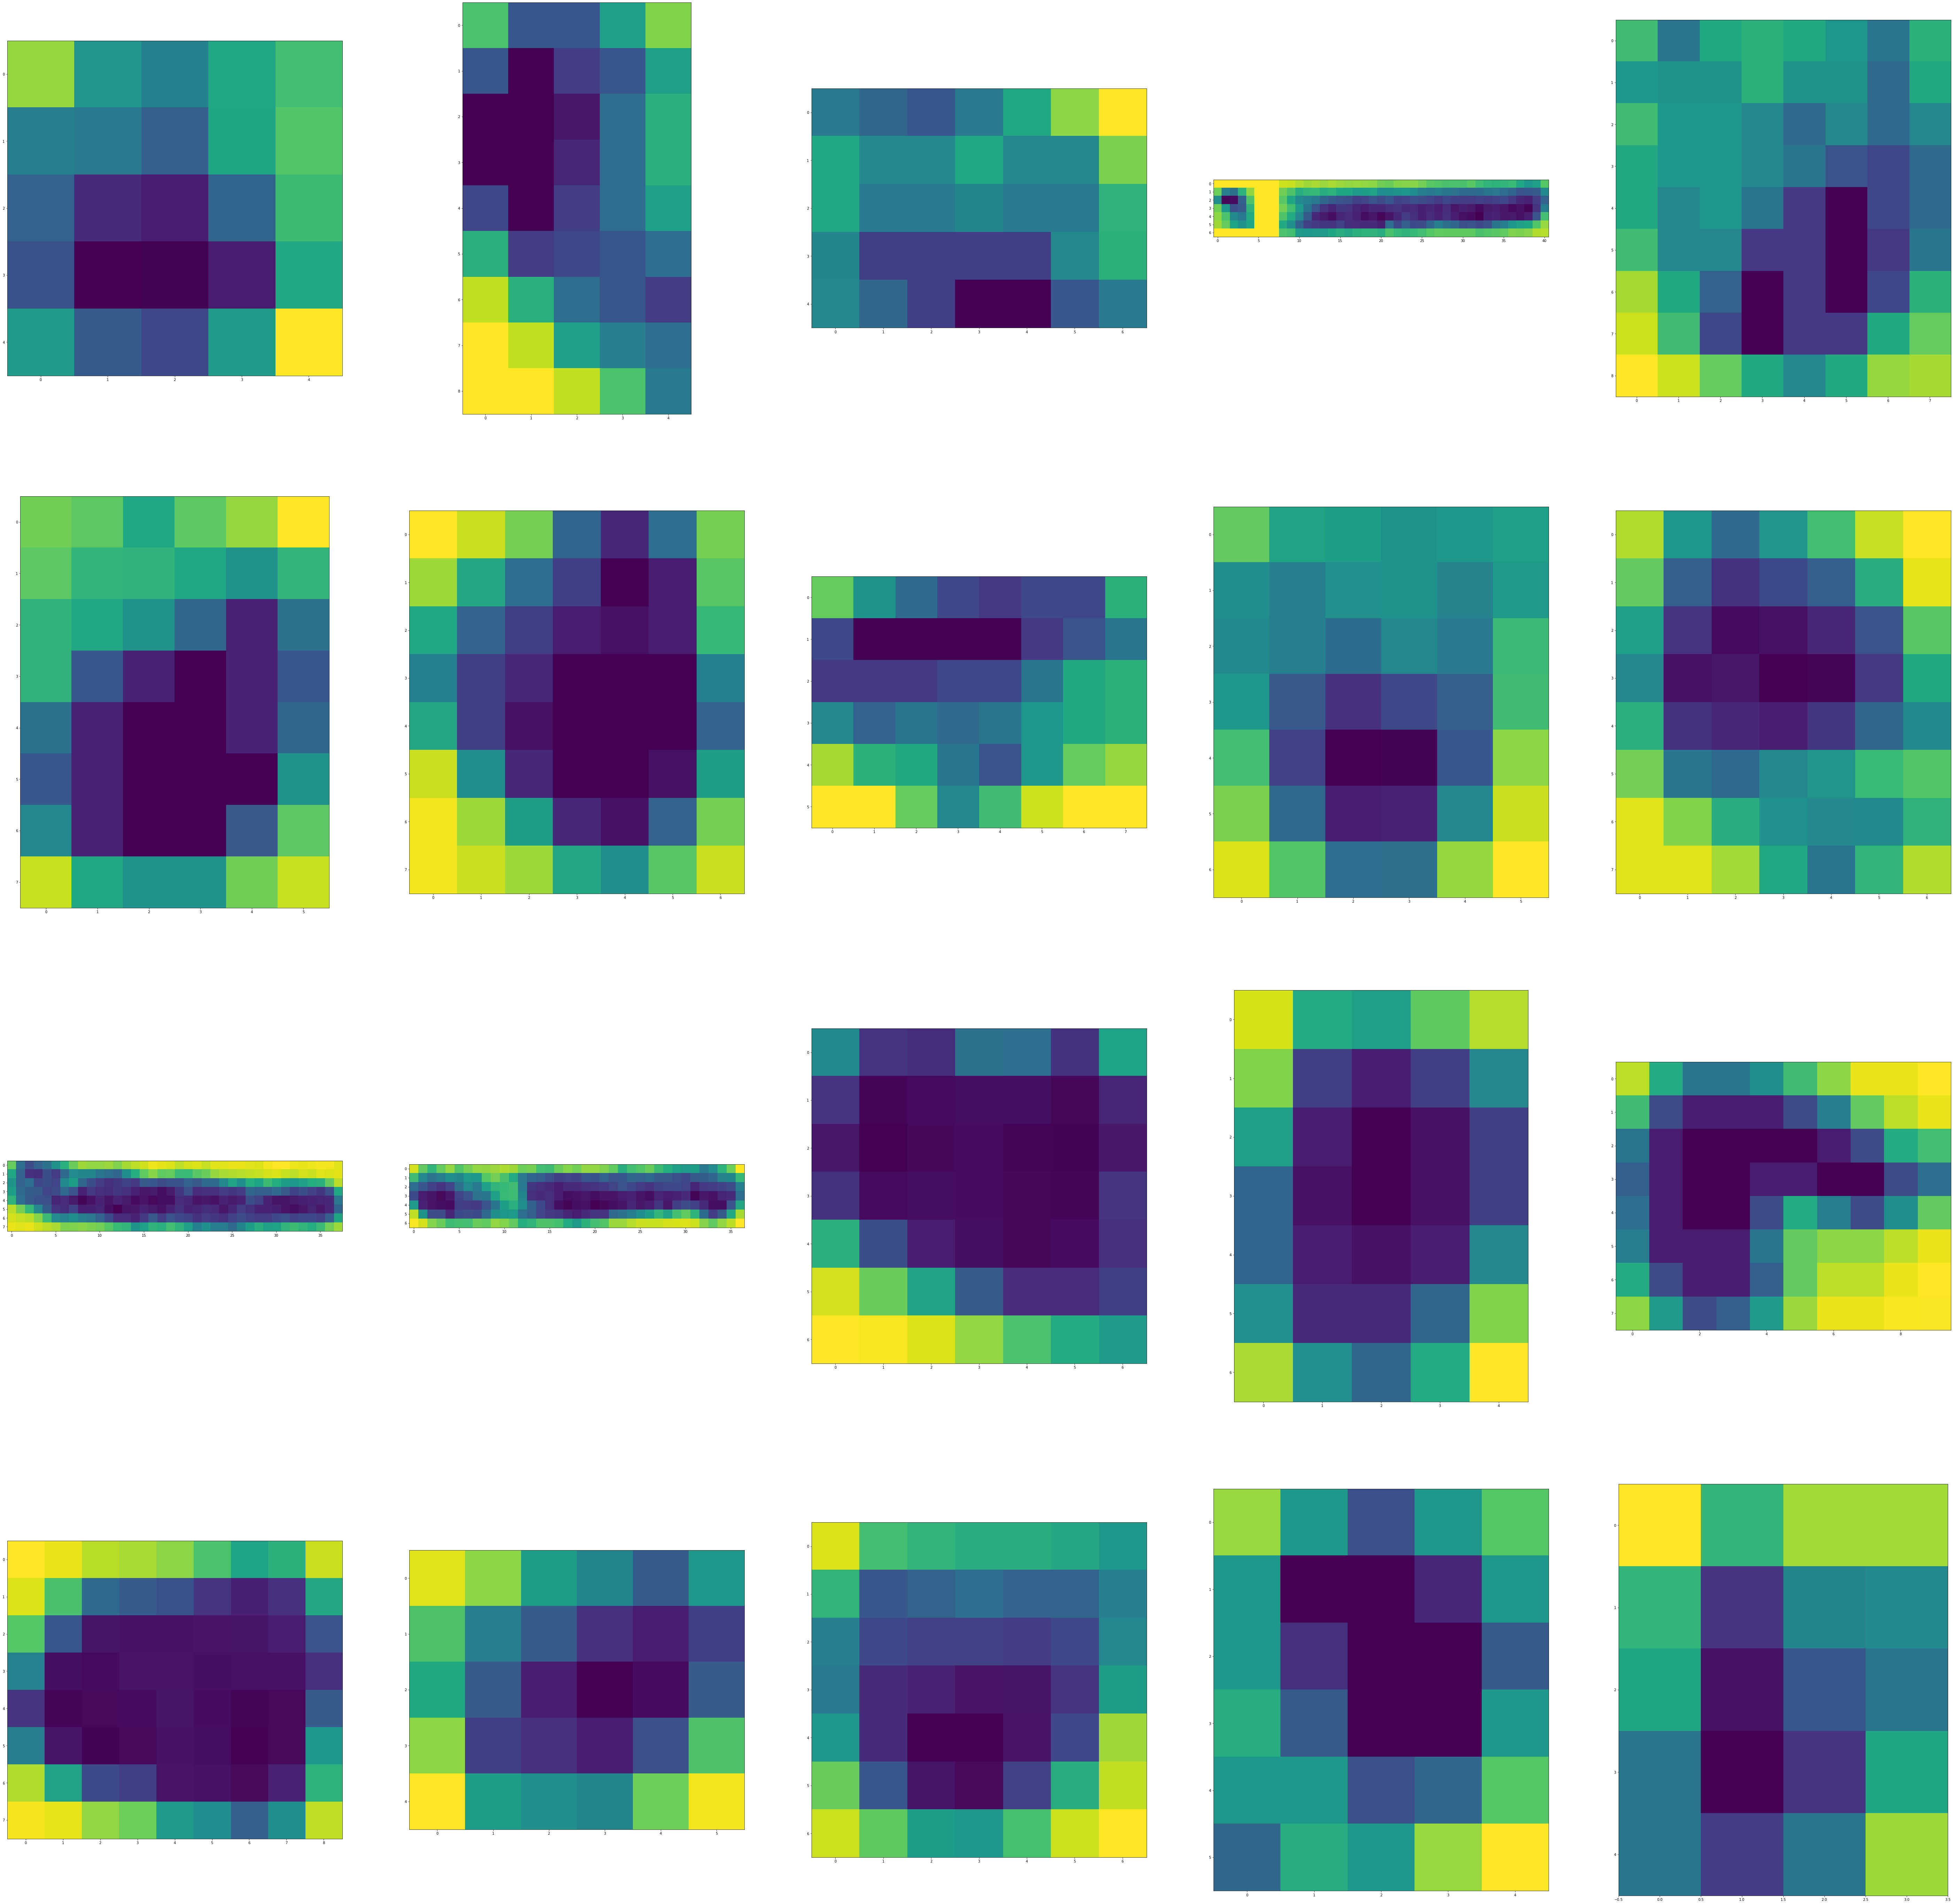

In [16]:
#Création d'un DF contenant les images ayant une hauteur comprise entre 0 et 10 et pour lesquelles les mots n'ont pas été detecté
dferr = df_words[(df_words['height'] <10) & (df_words['height'] >0) & (df_words['target'] == 0)]

#Affichage aléatoire des images de ce dernier DF
fig=plt.figure(figsize=(100, 100))
columns = 5
rows = min(len(dferr)/5,4)
for i in range(1, columns*rows +1): 
    img = dferr.iloc[i,11]
    pil_im = PIL.Image.open(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.asarray(pil_im))

Même après un bon découpage de la ponctuation, celle-ci ne semble pas être correctement reconnue. Bien qu'il semble y avoir plusieurs cas d'exemple dans le dataset, le modéle ne semble pas avoir appris à les reconnaitre.
    

### Analyse visuel des erreurs dans un interval de grayLevel


<AxesSubplot:xlabel='greyLevel', ylabel='target'>

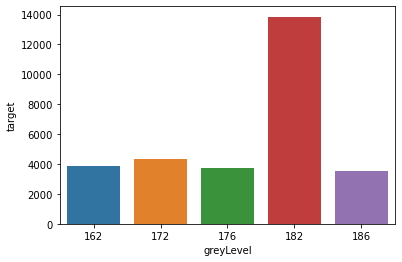

In [17]:
df_GL=dfClean.groupby(by='greyLevel',as_index= False).sum()
df_GL=df_GL.sort_values(by=['target'],ascending =False)
sns.barplot(x='greyLevel',y='target',data=df_GL.head(5))

    On note une forte concentration d'OK pour un niveau de gris de 182
    Il peut être intéressant d'étudier pourquoi cette nuance fournie autant de positif
    
    Concernant les nuances contenant le plus d'erreur :

<AxesSubplot:xlabel='greyLevel', ylabel='target'>

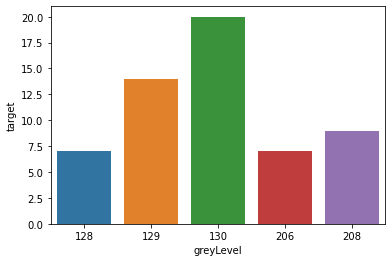

In [18]:
df_GL=df_GL.sort_values(by=['target'],ascending =True)
df_GL.head(10)
sns.barplot(x='greyLevel',y='target',data=df_GL.head())

        En analysant ce graphe il est difficle de faire la différence entre les nuances avec des erreurs ou sans

        Si on essait maintenant de faire la même analyse avec la densité d'erreur par GL

<AxesSubplot:xlabel='greyLevel', ylabel='target'>

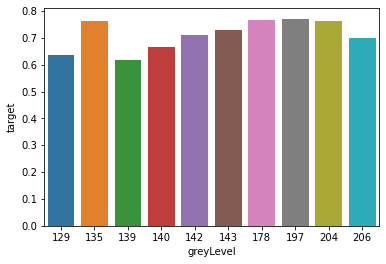

In [19]:
#Création d'un Data Frame df_GL groupé par les nuances de gris
df_GL=dfClean.groupby(by='greyLevel',as_index= False).mean()
#Tri du DataFrame
df_GL=df_GL.sort_values(by=['target'],ascending =True)
df_GL=df_GL.head(10)

#Affichage du barplot
sns.barplot(x='greyLevel',y='target',data=df_GL)

    #### On peut retrouver les zones à forte densité d'erreur de notre pairplot
    Et en analysant les images de la nuance 139 par exemple: 

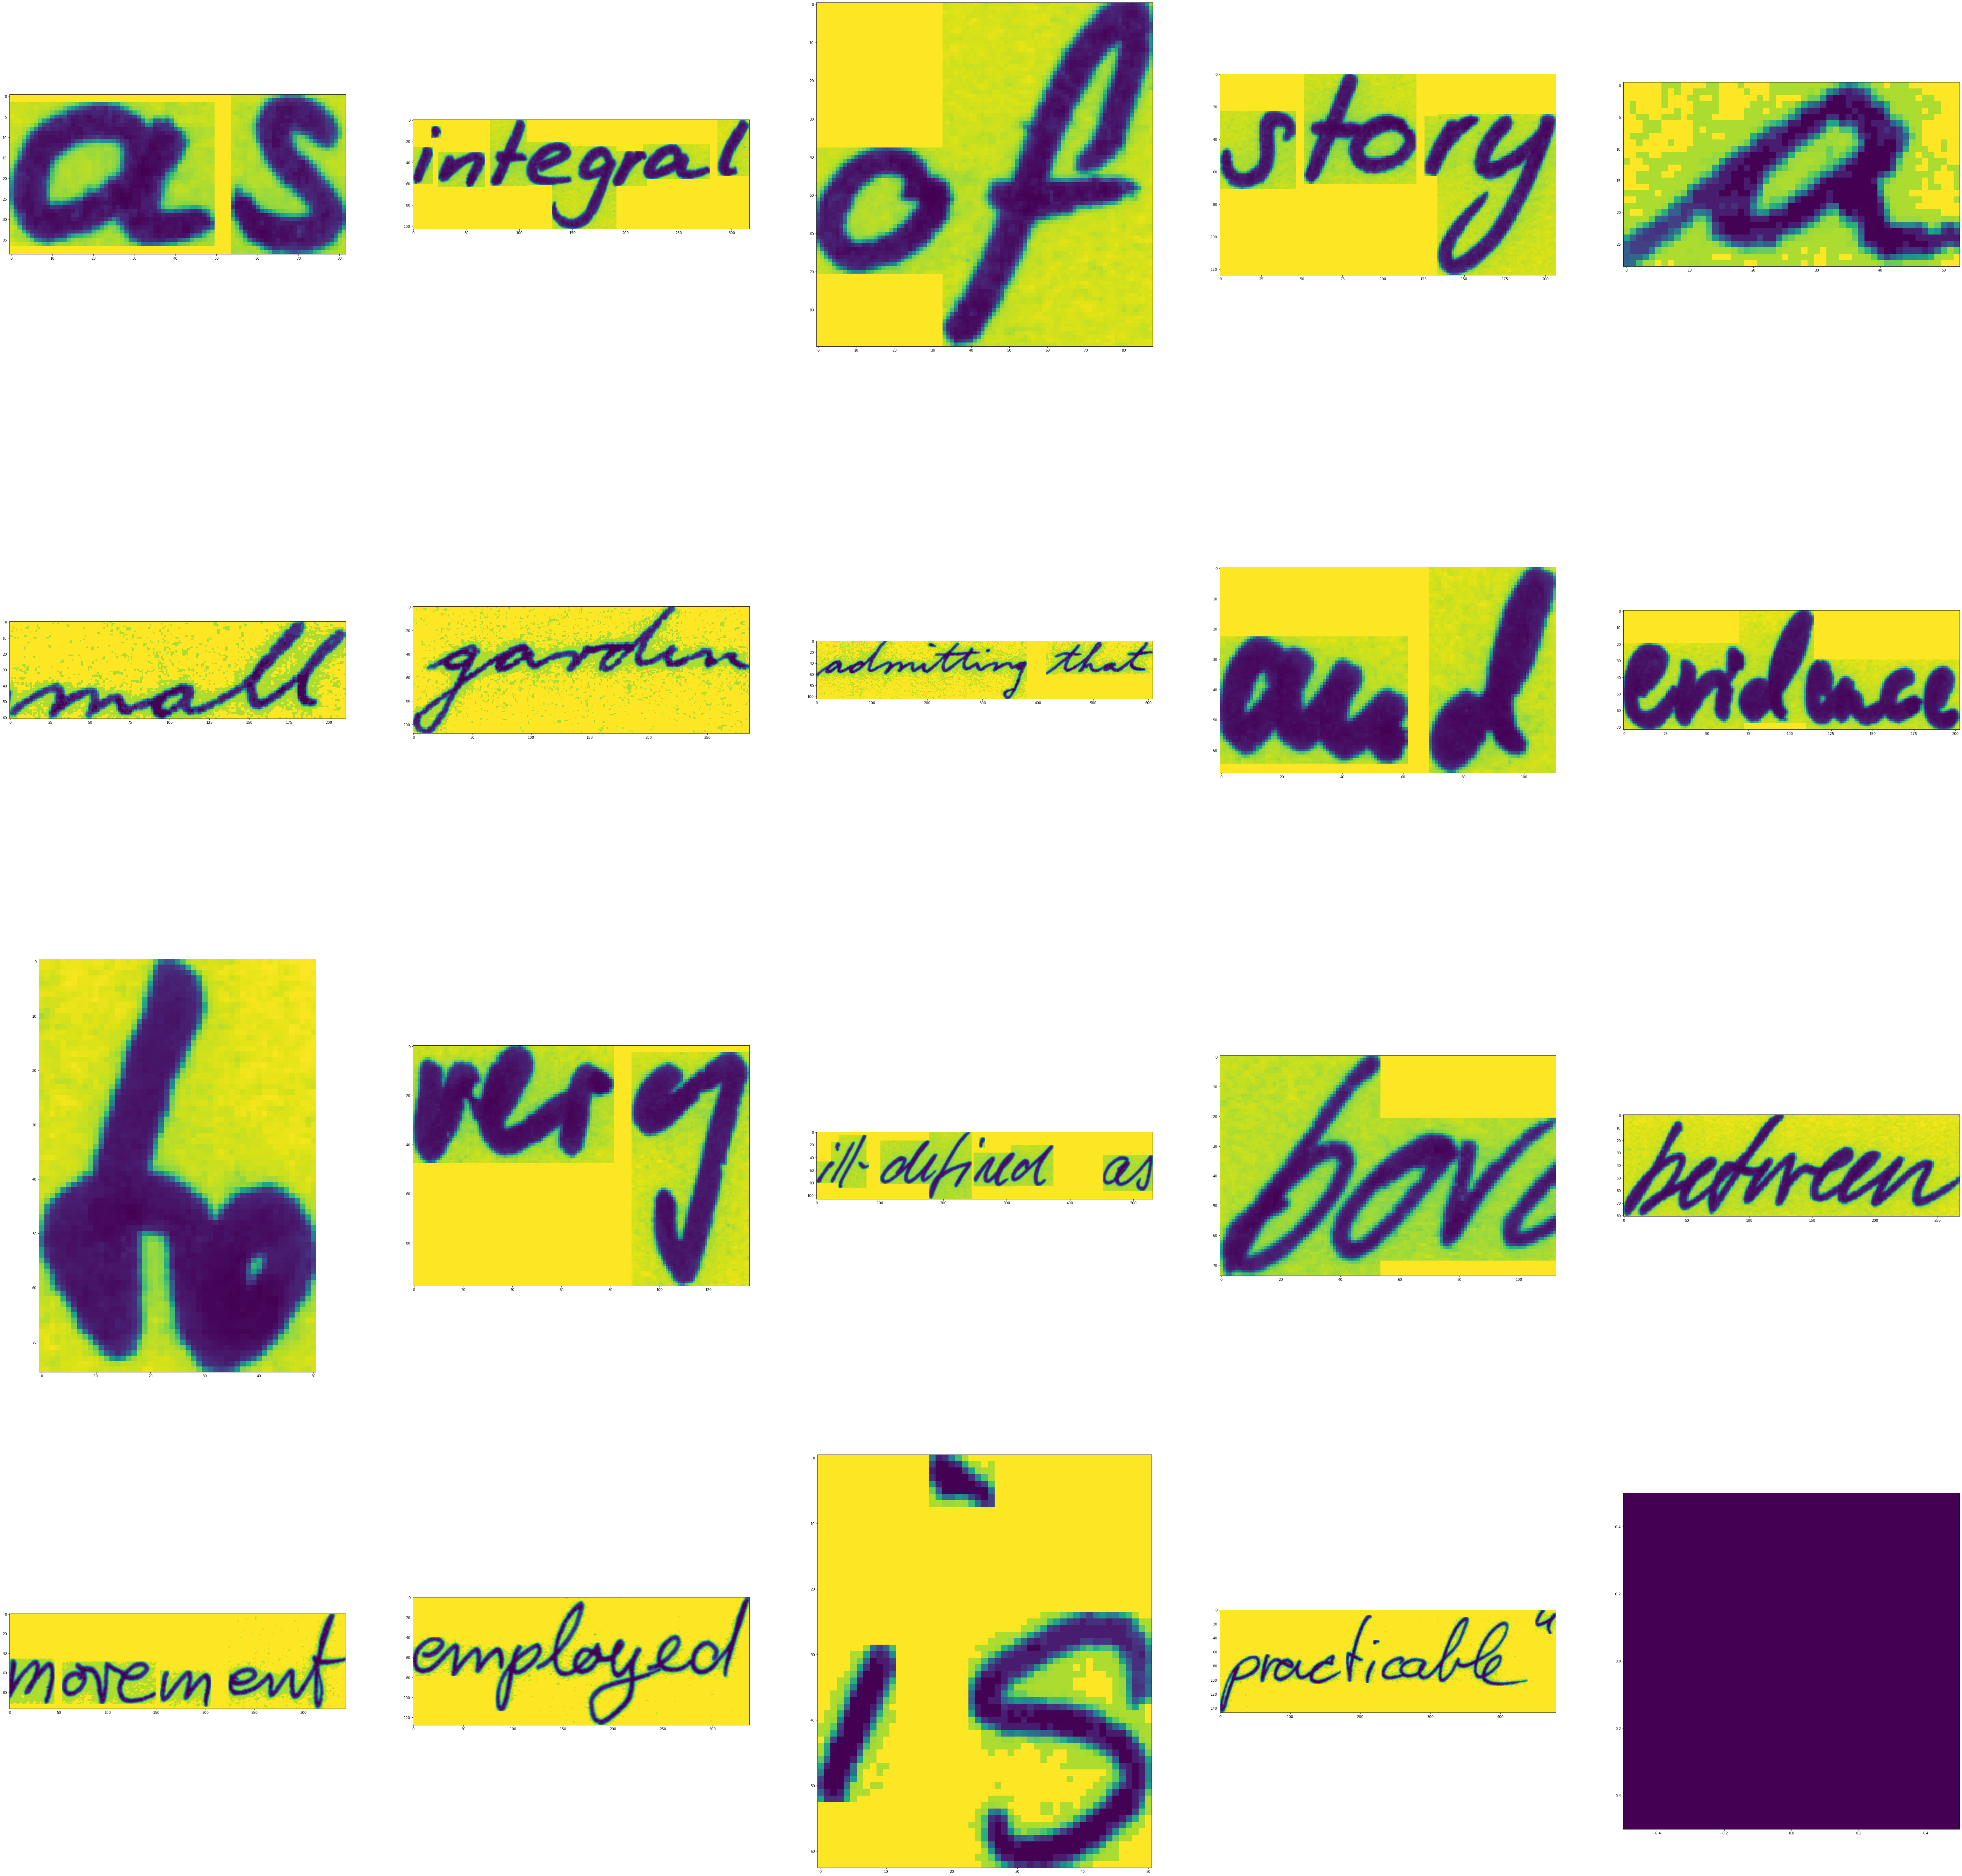

In [20]:
#Création d'un DataFrame contenant les mots non detectés et ayant un grayLevel à 139 
dferr = df_words[(df_words['greyLevel'] == 139) & (df_words['target'] == 0)]


#Affichage d'une figure contenant les cas présents dans le DataFrame précedement créé
fig=plt.figure(figsize=(100, 100))
columns = 5
rows = min(len(dferr)/5,4)
for i in range(1, columns*rows +1): 
    img = dferr.iloc[i+i,11]
    pil_im = PIL.Image.open(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.asarray(pil_im)) 

    ### On peut voir sur cette échantillion du bruit sur les images ce qui a probablement empêché la detection
    ### On peut suppose qu'en améliorant le traitement de l'image on pourrait augmenter le taux de reconnaissance

# Analyse des données



In [21]:
#Ajout d'une colonne contenant 1 sur chaque ligne afin de compter les occurences de chaque mot
dfClean['count'] = 1

#Création d'un nouveau DF permetant de présenter le nombres d'occurence de chaque mot groupé par la target
dfw = dfClean.groupby(by=['word', 'target']).agg({
     'count':'count',
     'greyLevel':'mean', 
     'width':'mean', 
     'height':'mean', 
     'len':'mean', 
     'space_in_text':'mean'}).reset_index()


#Choix de 2 chiffres après la virgules pour les champs décimaux
dfw = round(dfw, 2)
dfw = dfw.sort_values(by=[ 'word'],ascending =False)

In [22]:
dfw.head(15)

word  target  count  greyLevel   width  height  len  \
16788          zone       1      4     194.25  189.75   65.00    4   
16787          zone       0      1     183.00  244.00  128.00    4   
16786  zirconium-95       1      1     163.00  442.00   56.00   12   
16785      zirconia       1      1     188.00  358.00  130.00    8   
16784       zestful       1      1     167.00  369.00  107.00    7   
16783          zest       1      1     181.00  137.00   73.00    4   
16782          zero       1      1     189.00  176.00   57.00    4   
16781          zeal       1      1     194.00  143.00  146.00    4   
16780         youth       1      2     178.50  252.00  106.00    5   
16779    yourselves       1      1     180.00  429.00  115.00   10   
16778      yourself       1      9     174.22  307.56  102.44    8   
16777      yourself       0      4     182.25  296.00   97.50    8   
16776         yours       1      2     181.50  202.00   81.00    5   
16775          your       1     67     179.10  153.03   75.19    4   
16774          your       0     30     177.10  148.20   77.73    4   

       space_in_text  
16788              0  
16787              0  
16786              0  
16785              0  
16784              0  
16783              0  
16782              0  
16781              0  
16780              0  
16779              0  
16778              0  
16777              0  
16776              0  
16775              0  
16774              0

    Dans ce dataframe nous essayons de mettre en avant les différences entre les ocurrences détectées 
        et non détectées d'un même mot
    
    Prenons le cas du mot 'yourself :
        Nous avons 13 occurences du mot dans notre dataset avec 9 OK et 4 KO
        On ne s'intéresse volontairement pas à la place des mots dans la feuille
        Si nous affichons les images :

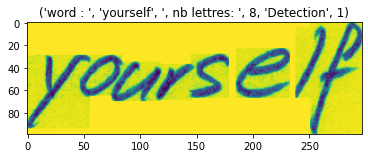

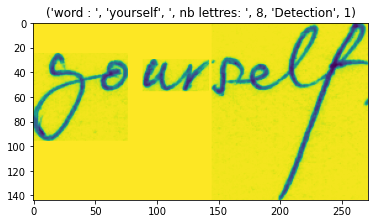

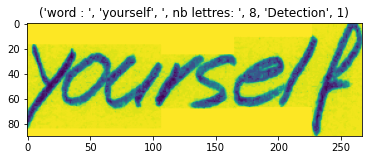

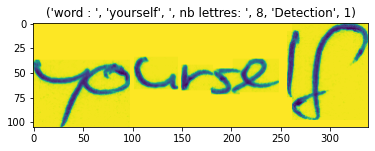

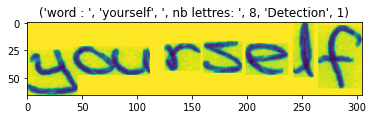

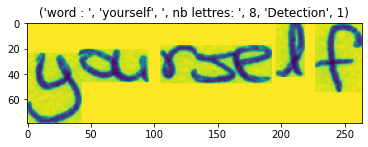

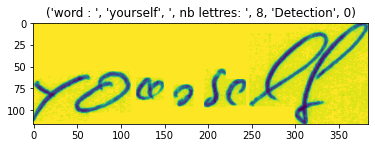

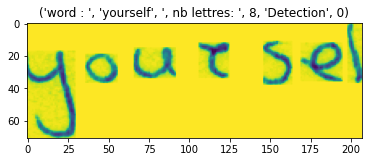

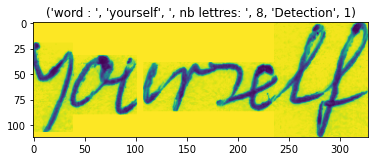

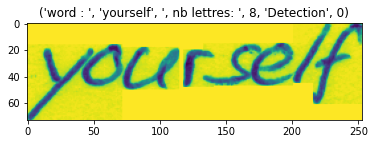

In [23]:
#Création d'un DF contenant les lignes dont le mot est 'yourself'
dferr = df_words[df_words['word'] == 'yourself']

#Affichage aléatoire des 10 premieres images du DF
for index  in dferr.sample(n=10).index:
    img = mpimg.imread(dferr.loc[index,'path'])
    imgplot = plt.imshow(img)
    title = 'word : ',dferr.loc[index,'word'], ', nb lettres: ',dferr.loc[index,'len'], 'Detection',  dferr.loc[index,'target']
    plt.title(title)
    plt.show()

    ### Ces résultats nous laissent penser que certaines lettres peuvent augementer le nombre de KO
    Une analyse statistique de la corrélation entre chaque lettres et notre variable cible 
    pourrait être pretinante par la suite

    #### Dernière analyse : on s'est posé la question des mots n'ayant jamais ou toujours été détecté

In [24]:
dfwunique=dfw.groupby(by='word',as_index= False).sum()
dfwunique['len2']=dfwunique['word'].apply(len)

dfwunique= dfwunique[dfwunique['len']==dfwunique['len2']]
dfwunique_Ok = dfwunique[dfwunique['target']==1]
dfwunique_Ko = dfwunique[dfwunique['target']==0]

In [25]:
#Affichage du DF avec les valeurs trié sur le count décroissant
dfwunique_Ok.sort_values(by='count',ascending=False)


word  target  count  greyLevel   width  height  len  \
12028        strong       1     37     174.05  203.16  110.86    6   
2148      Macmillan       1     29     178.45  374.41   83.55    9   
8952         method       1     27     175.19  240.11   69.15    6   
7651         health       1     26     178.19  200.92   68.92    6   
11446         shops       1     22     162.05  198.50   93.55    5   
...             ...     ...    ...        ...     ...     ...  ...   
5311      confident       1      1     179.00  342.00   53.00    9   
5310    confidences       1      1     177.00  428.00  100.00   11   
5308        confide       1      1     191.00  392.00   80.00    7   
5306        confess       1      1     157.00  214.00  103.00    7   
13539  zirconium-95       1      1     163.00  442.00   56.00   12   

       space_in_text  len2  
12028              0     6  
2148               0     9  
8952               0     6  
7651               0     6  
11446              0     5  
...              ...   ...  
5311               0     9  
5310               0    11  
5308               0     7  
5306               0     7  
13539              0    12  

[8973 rows x 9 columns]

In [26]:
#Affichage du DF avec les valeurs trié sur le count décroissant
dfwunique_Ko.sort_values(by='count',ascending=False)

word  target  count  greyLevel   width  height  len  \
4021      aren't       0      4     182.50  181.75   76.25    6   
12073  submitted       0      4     184.25  374.75   84.25    9   
3526           X       0      3     178.67   79.33  125.67    1   
2213       Matzo       0      3     172.67  214.00   68.67    5   
8325      joking       0      3     175.67  286.00  118.33    6   
...          ...     ...    ...        ...     ...     ...  ...   
3164       Swiss       0      1     188.00  154.00   73.00    5   
3163       Swede       0      1     194.00  168.00   48.00    5   
3162       Sweat       0      1     170.00  213.00   92.00    5   
3156        Sure       0      1     168.00  165.00   87.00    4   
13526   youngish       0      1     167.00  263.00   98.00    8   

       space_in_text  len2  
4021               0     6  
12073              0     9  
3526               0     1  
2213               0     5  
8325               0     6  
...              ...   ...  
3164               0     5  
3163               0     5  
3162               0     5  
3156               0     4  
13526              0     8  

[1320 rows x 9 columns]

    On peut remarquer que l'on a que très peu d'occurrences des mots n'ayant jamais été détecté
    on peut penser à un enrichissment du dataset pour aider à améliorer les résultats

## Conclusion

Cette première analyse du Data Set nous ouvre un grand nombre de voies sur la compréhension des méthodes de détection.

En effet l'analyse de ces résultats et principalement des KO nous apprennent beaucoup sur les cas de figure problématiques rencontrées par le modèle :
    - Difficulté dans le split des phrases en mots 
    - Bruit de l'image un peu trop fort
    - présence de mots raturés
    - Mots tronqués
    
Et elle nous permets aussi de pouvoir émettre quelques hypothèse à valider pour améliorer les performance du modèle:
    - Lettre "accidentogène" voir même en poussant le raisonnement des combinaisons du type "RS"
    - Le ratio w/h pourrait permettre d'identifier des images KO avant traitement
    - Un traitement du bruit des image pourrait améliorer performance du modèle


Par ailleurs, ce travail nous a permis de mieux maitriser la Data Visualization et les différentes actions possibles avec les DF python.